<a href="https://colab.research.google.com/github/MateusSanfer/Telecom-X-Parte-2-Prevendo-Churn/blob/main/Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando as bibliotecas

In [93]:
import pandas as pd

## Carregando dados tratados

In [94]:
url_dados_tratados = 'https://raw.githubusercontent.com/MateusSanfer/Challenge-Telecom-X-One/refs/heads/main/dados_tratados.csv'

try:
  dados_tratados = pd.read_csv(url_dados_tratados)
  print('Dados carregados com sucesso!')
except Exception as e:
  print(f'Erro ao carregar os dados: {e}')

dados_tratados.head()

Dados carregados com sucesso!


customer_id  churn  gender  senior_citizen  partner  dependents  tenure  \
0  0002-ORFBO      0  Female               0        1           1       9   
1  0003-MKNFE      0    Male               0        0           0       9   
2  0004-TLHLJ      1    Male               0        0           0       4   
3  0011-IGKFF      1    Male               1        1           0      13   
4  0013-EXCHZ      1  Female               1        1           0       3   

   phone_service multiple_lines internet_service  ... device_protection  \
0              1             No              DSL  ...                No   
1              1            Yes              DSL  ...                No   
2              1             No      Fiber optic  ...               Yes   
3              1             No      Fiber optic  ...               Yes   
4              1             No      Fiber optic  ...                No   

  tech_support streaming_tv streaming_movies        contract  \
0          Yes          Yes               No        One year   
1           No           No              Yes  Month-to-month   
2           No           No               No  Month-to-month   
3           No          Yes              Yes  Month-to-month   
4          Yes          Yes               No  Month-to-month   

  paperless_billing    payment_method  monthly_charges total_charges  \
0                 1      Mailed check             65.6        593.30   
1                 0      Mailed check             59.9        542.40   
2                 1  Electronic check             73.9        280.85   
3                 1  Electronic check             98.0       1237.85   
4                 1      Mailed check             83.9        267.40   

   contas_diarias  
0        2.186667  
1        1.996667  
2        2.463333  
3        3.266667  
4        2.796667  

[5 rows x 22 columns]

In [95]:
dados_tratados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7032 non-null   object 
 1   churn              7032 non-null   int64  
 2   gender             7032 non-null   object 
 3   senior_citizen     7032 non-null   int64  
 4   partner            7032 non-null   int64  
 5   dependents         7032 non-null   int64  
 6   tenure             7032 non-null   int64  
 7   phone_service      7032 non-null   int64  
 8   multiple_lines     7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_tv       7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  contract           7032 

In [96]:
dados_tratados.describe()

churn  senior_citizen      partner   dependents       tenure  \
count  7032.000000     7032.000000  7032.000000  7032.000000  7032.000000   
mean      0.265785        0.162400     0.482509     0.298493    32.421786   
std       0.441782        0.368844     0.499729     0.457629    24.545260   
min       0.000000        0.000000     0.000000     0.000000     1.000000   
25%       0.000000        0.000000     0.000000     0.000000     9.000000   
50%       0.000000        0.000000     0.000000     0.000000    29.000000   
75%       1.000000        0.000000     1.000000     1.000000    55.000000   
max       1.000000        1.000000     1.000000     1.000000    72.000000   

       phone_service  paperless_billing  monthly_charges  total_charges  \
count    7032.000000        7032.000000      7032.000000    7032.000000   
mean        0.903299           0.592719        64.798208    2283.300441   
std         0.295571           0.491363        30.085974    2266.771362   
min         0.000000           0.000000        18.250000      18.800000   
25%         1.000000           0.000000        35.587500     401.450000   
50%         1.000000           1.000000        70.350000    1397.475000   
75%         1.000000           1.000000        89.862500    3794.737500   
max         1.000000           1.000000       118.750000    8684.800000   

       contas_diarias  
count     7032.000000  
mean         2.159940  
std          1.002866  
min          0.608333  
25%          1.186250  
50%          2.345000  
75%          2.995417  
max          3.958333

In [97]:
dados_tratados.columns

Index(['customer_id', 'churn', 'gender', 'senior_citizen', 'partner',
       'dependents', 'tenure', 'phone_service', 'multiple_lines',
       'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies',
       'contract', 'paperless_billing', 'payment_method', 'monthly_charges',
       'total_charges', 'contas_diarias'],
      dtype='object')

## Remo√ß√£o de Colunas Irrelevantes

In [98]:
# Removendo a coluna de identifica√ß√£o
dados_tratados = dados_tratados.drop(columns=['customer_id'], axis=1)
# dados_tratados = dados_tratados.drop(columns=['customer_id', 'contas_diarias'], axis=1)
dados_tratados

churn  gender  senior_citizen  partner  dependents  tenure  \
0         0  Female               0        1           1       9   
1         0    Male               0        0           0       9   
2         1    Male               0        0           0       4   
3         1    Male               1        1           0      13   
4         1  Female               1        1           0       3   
...     ...     ...             ...      ...         ...     ...   
7027      0  Female               0        0           0      13   
7028      1    Male               0        1           0      22   
7029      0    Male               0        0           0       2   
7030      0    Male               0        1           1      67   
7031      0    Male               0        1           1      63   

      phone_service multiple_lines internet_service online_security  ...  \
0                 1             No              DSL              No  ...   
1                 1            Yes              DSL              No  ...   
2                 1             No      Fiber optic              No  ...   
3                 1             No      Fiber optic              No  ...   
4                 1             No      Fiber optic              No  ...   
...             ...            ...              ...             ...  ...   
7027              1             No              DSL             Yes  ...   
7028              1            Yes      Fiber optic              No  ...   
7029              1             No              DSL              No  ...   
7030              1             No              DSL             Yes  ...   
7031              0             No              DSL             Yes  ...   

     device_protection tech_support streaming_tv streaming_movies  \
0                   No          Yes          Yes               No   
1                   No           No           No              Yes   
2                  Yes           No           No               No   
3                  Yes           No          Yes              Yes   
4                   No          Yes          Yes               No   
...                ...          ...          ...              ...   
7027                No          Yes           No               No   
7028                No           No           No              Yes   
7029                No           No           No               No   
7030               Yes          Yes           No              Yes   
7031               Yes           No          Yes              Yes   

            contract paperless_billing    payment_method monthly_charges  \
0           One year                 1      Mailed check           65.60   
1     Month-to-month                 0      Mailed check           59.90   
2     Month-to-month                 1  Electronic check           73.90   
3     Month-to-month                 1  Electronic check           98.00   
4     Month-to-month                 1      Mailed check           83.90   
...              ...               ...               ...             ...   
7027        One year                 0      Mailed check           55.15   
7028  Month-to-month                 1  Electronic check           85.10   
7029  Month-to-month                 1      Mailed check           50.30   
7030        Two year                 0      Mailed check           67.85   
7031        Two year                 0  Electronic check           59.00   

      total_charges  contas_diarias  
0            593.30        2.186667  
1            542.40        1.996667  
2            280.85        2.463333  
3           1237.85        3.266667  
4            267.40        2.796667  
...             ...             ...  
7027         742.90        1.838333  
7028        1873.70        2.836667  
7029          92.75        1.676667  
7030        4627.65        2.261667  
7031        3707.60        1.966667  

[7032 rows x 21 columns]

## Encoding de Vari√°veis Categ√≥ricas


Para preparar os dados para algoritmos de machine learning que geralmente requerem entradas num√©ricas, aplicamos a t√©cnica de **One-Hot Encoding** √†s vari√°veis categ√≥ricas. Este m√©todo cria novas colunas bin√°rias para cada categoria √∫nica dentro de uma vari√°vel categ√≥rica, onde um valor de '1' indica a presen√ßa da categoria e '0' a aus√™ncia.

Utilizamos a fun√ß√£o `make_column_transformer` e a classe `OneHotEncoder` da biblioteca `sklearn.preprocessing` para realizar esta transforma√ß√£o de forma eficiente. As colunas categ√≥ricas selecionadas para o encoding incluem:

- gender
- multiple_lines
- internet_service
- online_security
- online_backup
- device_protection
- tech_support
- streaming_tv
- streaming_movies
- contract
- payment_method

O `handle_unknown='ignore'` foi configurado no `OneHotEncoder` para lidar com poss√≠veis valores desconhecidos durante a transforma√ß√£o, evitando erros. As colunas n√£o especificadas para o encoding foram mantidas no dataframe resultante utilizando `remainder='passthrough'`. O resultado dessa transforma√ß√£o √© armazenado em um novo DataFrame chamado `dados_encoded`, pronto para ser usado em modelos de machine learning.

In [99]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [100]:
colunas_categoricas = [
    'gender', 'multiple_lines', 'internet_service',
    'online_security', 'online_backup', 'device_protection',
    'tech_support', 'streaming_tv', 'streaming_movies',
    'contract', 'payment_method'
]

In [101]:
one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    colunas_categoricas),
    remainder='passthrough')
dados_encoded = one_hot_enc.fit_transform(dados_tratados)
dados_encoded = pd.DataFrame(dados_encoded, columns=one_hot_enc.get_feature_names_out())
dados_encoded

onehotencoder__gender_Female  onehotencoder__gender_Male  \
0                              1.0                         0.0   
1                              0.0                         1.0   
2                              0.0                         1.0   
3                              0.0                         1.0   
4                              1.0                         0.0   
...                            ...                         ...   
7027                           1.0                         0.0   
7028                           0.0                         1.0   
7029                           0.0                         1.0   
7030                           0.0                         1.0   
7031                           0.0                         1.0   

      onehotencoder__multiple_lines_No  onehotencoder__multiple_lines_Yes  \
0                                  1.0                                0.0   
1                                  0.0                                1.0   
2                                  1.0                                0.0   
3                                  1.0                                0.0   
4                                  1.0                                0.0   
...                                ...                                ...   
7027                               1.0                                0.0   
7028                               0.0                                1.0   
7029                               1.0                                0.0   
7030                               1.0                                0.0   
7031                               1.0                                0.0   

      onehotencoder__internet_service_DSL  \
0                                     1.0   
1                                     1.0   
2                                     0.0   
3                                     0.0   
4                                     0.0   
...                                   ...   
7027                                  1.0   
7028                                  0.0   
7029                                  1.0   
7030                                  1.0   
7031                                  1.0   

      onehotencoder__internet_service_Fiber optic  \
0                                             0.0   
1                                             0.0   
2                                             1.0   
3                                             1.0   
4                                             1.0   
...                                           ...   
7027                                          0.0   
7028                                          1.0   
7029                                          0.0   
7030                                          0.0   
7031                                          0.0   

      onehotencoder__internet_service_No  onehotencoder__online_security_No  \
0                                    0.0                                1.0   
1                                    0.0                                1.0   
2                                    0.0                                1.0   
3                                    0.0                                1.0   
4                                    0.0                                1.0   
...                                  ...                                ...   
7027                                 0.0                                0.0   
7028                                 0.0                                1.0   
7029                                 0.0                                1.0   
7030                                 0.0                                0.0   
7031                                 0.0                                0.0   

      onehotencoder__online_security_Yes  onehotencoder__online_backup_No  \
0                                    0.0                              0.0   
1      

## Verifica√ß√£o da Propor√ß√£o de Evas√£o

### Calcular a distribui√ß√£o percentual da coluna 'churn'.

Calcular a propor√ß√£o de cada classe (sim e n√£o) na coluna 'churn' para entender o desbalanceamento.

In [102]:
# Distribui√ß√£o absoluta
dados_tratados['churn'].value_counts()

churn
0    5163
1    1869
Name: count, dtype: int64

In [103]:
# Distribui√ß√£o percentual
dados_tratados['churn'].value_counts(normalize=True) * 100

churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64

/tmp/ipython-input-104-348269110.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='churn', data=dados_tratados, palette='Set2')


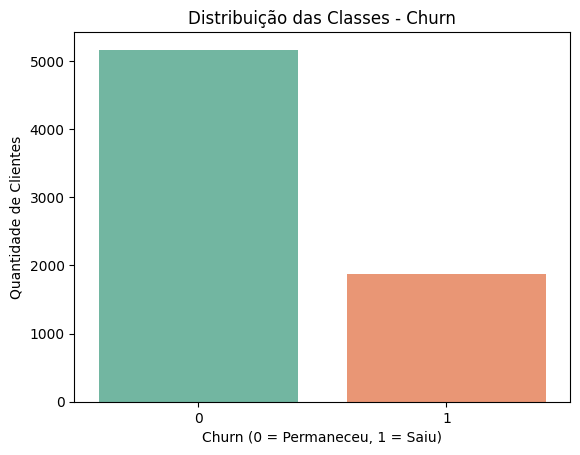

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='churn', data=dados_tratados, palette='Set2')
plt.title('Distribui√ß√£o das Classes - Churn')
plt.xlabel('Churn (0 = Permaneceu, 1 = Saiu)')
plt.ylabel('Quantidade de Clientes')
plt.show()

### Principais Conclus√µes da An√°lise de Dados

* Aproximadamente 73,42% dos clientes permaneceram ativos, enquanto cerca de 26,58% cancelaram o contrato.
* H√° um desequil√≠brio de classe significativo na vari√°vel de cancelamento, sendo a classe majorit√°ria os clientes que permaneceram ativos.

* O desbalanceamento de classes pode impactar negativamente o desempenho de modelos de machine learning tradicionais, pois eles tendem a ser otimizados para a acur√°cia geral e podem ter dificuldade em prever corretamente a classe minorit√°ria (churn). Isso pode levar a modelos que subestimam a evas√£o de clientes, o que √© cr√≠tico para neg√≥cios que buscam identificar e reter clientes em risco.

### Pr√≥ximos Passos

* O desequil√≠brio de classe identificado precisa ser corrigido durante a fase de constru√ß√£o do modelo, utilizando t√©cnicas como reamostragem ( SMOTE) ou algoritmos que lidam com dados desbalanceados para garantir uma previs√£o precisa da rotatividade de clientes.
* O pr√≥ximo passo envolve a aplica√ß√£o de t√©cnicas apropriadas para lidar com esse desequil√≠brio de classe antes do treinamento dos modelos de aprendizado de m√°quina.

## Balanceamento de Classes

In [105]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [106]:
X = dados_encoded.drop(columns=['remainder__churn'])
y = dados_tratados['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42,
                                                    stratify=y)
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# Verificando novas propor√ß√µes
print("Antes do SMOTE:")
print(y_train.value_counts(normalize=True))

print("\nDepois do SMOTE:")
print(y_res.value_counts(normalize=True))

Antes do SMOTE:
churn
0    0.734254
1    0.265746
Name: proportion, dtype: float64

Depois do SMOTE:
churn
1    0.5
0    0.5
Name: proportion, dtype: float64


## Padronizando os dados (normaliza√ß√£o z-score)

In [107]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res_scaled = scaler.fit_transform(X_res)
X_test_scaled = scaler.transform(X_test)

## Treinando o modelo escolhido `LogisticRegression` utilizando os dados de treino balanceados

In [108]:
from sklearn.linear_model import LogisticRegression
modelo_lr = LogisticRegression(random_state=42)
modelo_lr.fit(X_res_scaled, y_res)

LogisticRegression(random_state=42)

              precision    recall  f1-score   support

  Permaneceu       0.91      0.73      0.81      1549
        Saiu       0.52      0.80      0.63       561

    accuracy                           0.75      2110
   macro avg       0.71      0.77      0.72      2110
weighted avg       0.81      0.75      0.76      2110


Pontua√ß√£o AUC: 0.8443


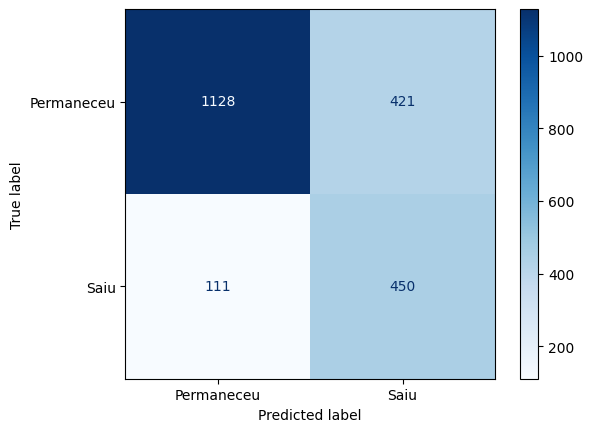

In [109]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred = modelo_lr.predict(X_test_scaled)

print(classification_report(y_test, y_pred, target_names=['Permaneceu', 'Saiu']))
auc_lr = roc_auc_score(y_test, modelo_lr.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontua√ß√£o AUC: {auc_lr:.4f}")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')

# Treinado com RandomForest
Treine um modelo de classifica√ß√£o nos dados de treino balanceados (`X_res`, `y_res`), fa√ßa previs√µes no conjunto de teste original (`X_test`) e avalie o desempenho do modelo utilizando m√©tricas apropriadas para problemas de classifica√ß√£o com desbalanceamento de classes.

## Escolha e importa√ß√£o do modelo

Selecionar um modelo de classifica√ß√£o adequado para o problema (por exemplo, Regress√£o Log√≠stica, Random Forest, ou Gradient Boosting) e importar a classe correspondente do scikit-learn.


**Racioc√≠nio**:
Importe a classe `RandomForestClassifier` de `sklearn.ensemble` conforme solicitado pela subtarefa.

In [110]:
from sklearn.ensemble import RandomForestClassifier

## Treinamento do modelo

Treinar o modelo de classifica√ß√£o escolhido (`RandomForestClassifier`) utilizando os dados de treino balanceados (`X_res`, `y_res`).


In [111]:
modelo_rf = RandomForestClassifier(random_state=42)
modelo_rf.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

## Previs√£o no conjunto de teste

Fazer previs√µes no conjunto de teste original (`X_test`) para avaliar o desempenho do modelo em dados n√£o vistos.


In [112]:
y_pred_rf = modelo_rf.predict(X_test)

## Avalia√ß√£o do modelo

Avaliar o desempenho do modelo utilizando m√©tricas apropriadas para problemas de classifica√ß√£o com desbalanceamento de classes, como precis√£o, recall, F1-score e a Curva ROC/AUC.


Relat√≥rio de Classifica√ß√£o:
              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1549
           1       0.60      0.49      0.54       561

    accuracy                           0.78      2110
   macro avg       0.71      0.69      0.70      2110
weighted avg       0.77      0.78      0.77      2110


Pontua√ß√£o AUC: 0.8158


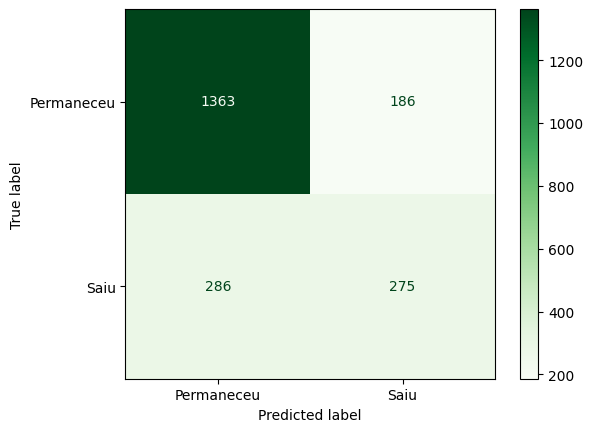

In [113]:
from sklearn.metrics import classification_report, roc_auc_score

print("Relat√≥rio de Classifica√ß√£o:")
print(classification_report(y_test, y_pred_rf))

auc_rf = roc_auc_score(y_test, modelo_rf.predict_proba(X_test)[:, 1])
print(f"\nPontua√ß√£o AUC: {auc_rf:.4f}")

# Matriz de confus√£o
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['Permaneceu', 'Saiu'], cmap='Greens')

## Treinando o modelo com KNN

Relat√≥rio de Classifica√ß√£o (KNN):
              precision    recall  f1-score   support

  Permaneceu       0.87      0.68      0.77      1549
        Saiu       0.45      0.72      0.55       561

    accuracy                           0.69      2110
   macro avg       0.66      0.70      0.66      2110
weighted avg       0.76      0.69      0.71      2110


Matriz de Confus√£o (KNN):

Pontua√ß√£o AUC (KNN): 0.7545


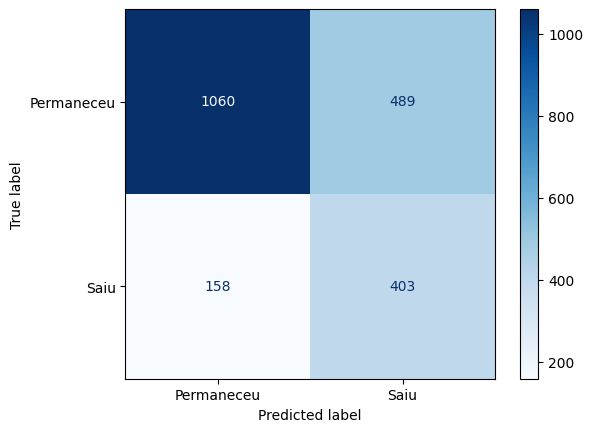

In [114]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Criando e treinando o modelo KNN
# Podemos ajustar o n√∫mero de vizinhos (n_neighbors) para otimizar o desempenho.
# Vamos come√ßar com um valor padr√£o, por exemplo, 5.
modelo_knn = KNeighborsClassifier(n_neighbors=5)
modelo_knn.fit(X_res_scaled, y_res)

# Fazendo previs√µes no conjunto de teste padronizado
y_pred_knn = modelo_knn.predict(X_test_scaled)

# Avaliando o desempenho do modelo
print("Relat√≥rio de Classifica√ß√£o (KNN):")
print(classification_report(y_test, y_pred_knn, target_names=['Permaneceu', 'Saiu']))

# Exibindo a matriz de confus√£o
print("\nMatriz de Confus√£o (KNN):")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn, display_labels=['Permaneceu', 'Saiu'], cmap='Blues')

# Calculando e exibindo a pontua√ß√£o AUC
auc_knn = roc_auc_score(y_test, modelo_knn.predict_proba(X_test_scaled)[:, 1])
print(f"\nPontua√ß√£o AUC (KNN): {auc_knn:.4f}")

## Resumo dos Modelos Treinados

### Q&A

**P: Qual foi o desempenho dos modelos de classifica√ß√£o treinados nos dados balanceados ao serem avaliados no conjunto de teste original?**

**R:** Treinamos e avaliamos tr√™s modelos de classifica√ß√£o nos dados balanceados com SMOTE: Regress√£o Log√≠stica, Random Forest e KNN.

*   **Regress√£o Log√≠stica:**
    *   Demonstrou o melhor poder de discrimina√ß√£o, alcan√ßando uma pontua√ß√£o AUC de **0.8443**.
    *   O relat√≥rio de classifica√ß√£o revelou alto recall para a classe 'Saiu' (0.80), o que indica uma boa capacidade de identificar clientes que provavelmente cancelar√£o.
    *   A precis√£o para a classe 'Saiu' foi de 0.52, resultando em um n√∫mero consider√°vel de falsos positivos.
    *   O F1-score para a classe 'Saiu' foi de 0.63.

*   **Random Forest:**
    *   Obteve uma pontua√ß√£o AUC de **0.8158**.
    *   Apresentou uma precis√£o maior para a classe 'Saiu' (0.60) em compara√ß√£o com a Regress√£o Log√≠stica.
    *   O recall para a classe 'Saiu' foi menor (0.49), indicando que identificou menos clientes que de fato cancelaram.
    *   O F1-score para a classe 'Saiu' foi de 0.54.

*   **KNN:**
    *   Alcan√ßou uma pontua√ß√£o AUC de **0.7545**.
    *   Demonstrou um recall razo√°vel para a classe 'Saiu' (0.72), mas com a menor precis√£o entre os tr√™s modelos (0.45).
    *   O F1-score para a classe 'Saiu' foi de 0.55.

### Principais descobertas da an√°lise de modelos

*   A **Regress√£o Log√≠stica** se destacou com a maior pontua√ß√£o AUC, indicando sua superioridade em distinguir entre clientes que cancelam e os que n√£o cancelam.
*   O balanceamento dos dados de treino com SMOTE foi crucial para melhorar a capacidade dos modelos em identificar a classe minorit√°ria (churn). A Regress√£o Log√≠stica, em particular, demonstrou um recall notavelmente alto para a classe 'Saiu' (0.80).
*   Todos os modelos apresentaram um desafio comum: uma precis√£o menor para a classe 'Saiu' em compara√ß√£o com o recall. Isso implica que, embora sejam razoavelmente bons em identificar clientes em risco de churn, eles tamb√©m classificam incorretamente um n√∫mero significativo de clientes que n√£o cancelariam como churn.

### Insights ou Pr√≥ximos Passos

*   Com a Regress√£o Log√≠stica apresentando o melhor desempenho geral (maior AUC e F1-score para a classe de churn), ela seria uma candidata forte para implanta√ß√£o, dependendo dos objetivos de neg√≥cio.
*   Apesar do bom desempenho da Regress√£o Log√≠stica, a baixa precis√£o para a classe de churn ainda √© um ponto de aten√ß√£o. Ajustar o limiar de decis√£o do modelo de Regress√£o Log√≠stica pode ser um pr√≥ximo passo valioso para encontrar um equil√≠brio ideal entre precis√£o e recall, alinhado com os custos e benef√≠cios de abordar falsos positivos versus perder a oportunidade de reter clientes que realmente churnariam.
*   Continuar com a an√°lise de correla√ß√£o e sele√ß√£o de vari√°veis √© o pr√≥ximo passo l√≥gico no desafio. Isso pode ajudar a refinar os modelos e potencialmente melhorar seu desempenho.

#üìÑRelatorio Final

## An√°lise de Correla√ß√£o

### Visualizando a Matriz de Correla√ß√£o

Calcular a matriz de correla√ß√£o para as vari√°veis num√©ricas e visualiz√°-la usando um heatmap para identificar rela√ß√µes, focando na correla√ß√£o com a vari√°vel 'churn'.

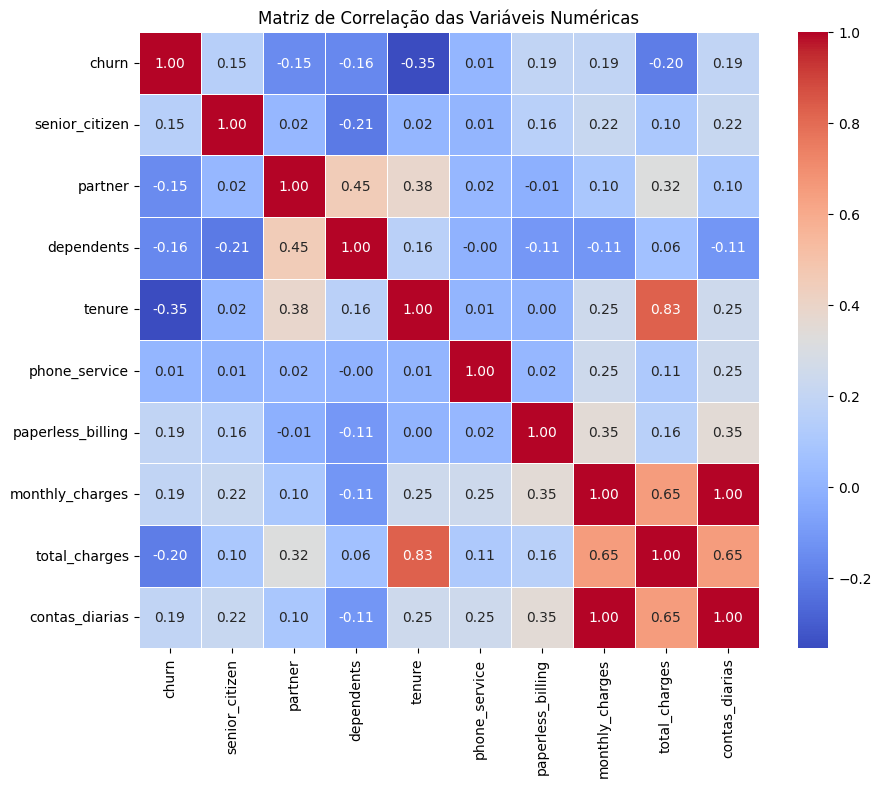

In [116]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecionando apenas as colunas num√©ricas
dados_numericos = dados_tratados.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correla√ß√£o
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correla√ß√£o com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correla√ß√£o das Vari√°veis Num√©ricas')
plt.show()

üìä An√°lise de Correla√ß√£o com a Evas√£o (Churn)
Para identificar os fatores mais relacionados √† evas√£o de clientes, realizamos uma an√°lise de correla√ß√£o entre as vari√°veis num√©ricas e a vari√°vel alvo churn.

üîπ Principais descobertas:

Correla√ß√£o Negativa (menor chance de churn):

* `tenure` (r = -0.35): Clientes com mais tempo de contrato t√™m menor propens√£o √† evas√£o.

* `total_charges` (r = -0.20): Quanto maior o total gasto, menor a chance de cancelamento.

* `partner e dependents` (ambas cerca de r = -0.15): Ter parceiro ou dependentes se associa a uma leve redu√ß√£o na evas√£o.

Correla√ß√£o Positiva (maior chance de churn):

* `monthly_charge`s (r = 0.19): Clientes com faturas mensais mais altas tendem a sair com mais frequ√™ncia.

* `paperless_billing` e `senior_citizen` (ambos r ‚âà 0.15-0.19): Tamb√©m apresentam leve associa√ß√£o com maior churn.

üîÅ Multicolinearidade identificada:

* `monthly_charges` e `contas_diarias` apresentaram correla√ß√£o perfeita (r = 1.00), indicando que uma √© derivada da outra.

  ‚û°Ô∏è A vari√°vel `contas_diarias` foi removida do dataset.

‚úÖ Com base nessa an√°lise, priorizaremos vari√°veis com maior correla√ß√£o com churn na modelagem preditiva e evitaremos redund√¢ncias que possam comprometer a performance de alguns algoritmos.

In [117]:
dados_tratados = dados_tratados.drop(columns=['contas_diarias'])

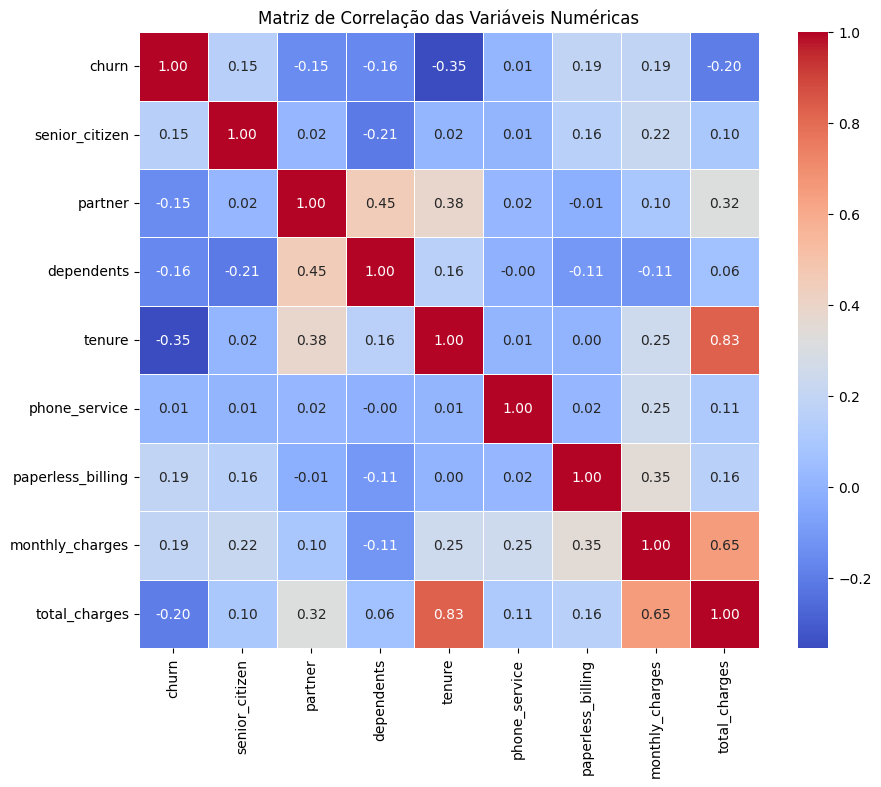

In [118]:
# Selecionando apenas as colunas num√©ricas
dados_numericos = dados_tratados.select_dtypes(include=['int64', 'float64'])

# Calculando a matriz de correla√ß√£o
matriz_correlacao = dados_numericos.corr()

# Visualizando a matriz de correla√ß√£o com um heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correla√ß√£o das Vari√°veis Num√©ricas')
plt.show()

## An√°lises Direcionadas: Tempo de Contrato e Total Gasto vs Evas√£o

### Boxplot: Tempo de Contrato (Tenure) vs Evas√£o (Churn)

Visualizar a distribui√ß√£o do tempo de contrato para clientes que permaneceram (0) e que sa√≠ram (1) para entender se o tempo de perman√™ncia influencia na evas√£o.

/tmp/ipython-input-121-82825298.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='tenure', data=dados_tratados, palette='viridis')


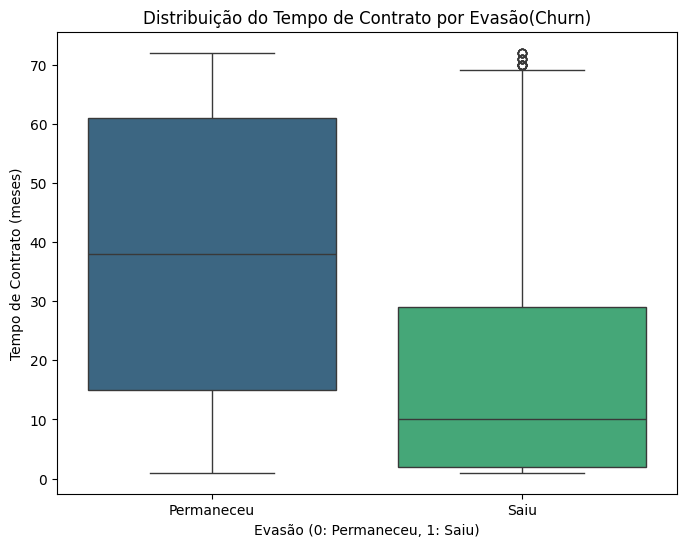

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='tenure', data=dados_tratados, palette='viridis')
plt.title('Distribui√ß√£o do Tempo de Contrato por Evas√£o(Churn)')
plt.xlabel('Evas√£o (0: Permaneceu, 1: Saiu)')
plt.ylabel('Tempo de Contrato (meses)')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

### Boxplot: Total Gasto (Total Charges) vs Evas√£o (Churn)

Visualizar a distribui√ß√£o do total gasto por clientes que permaneceram (0) e que sa√≠ram (1) para entender se o valor total gasto influencia na evas√£o.

/tmp/ipython-input-122-1595302665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='total_charges', data=dados_tratados, palette='viridis')


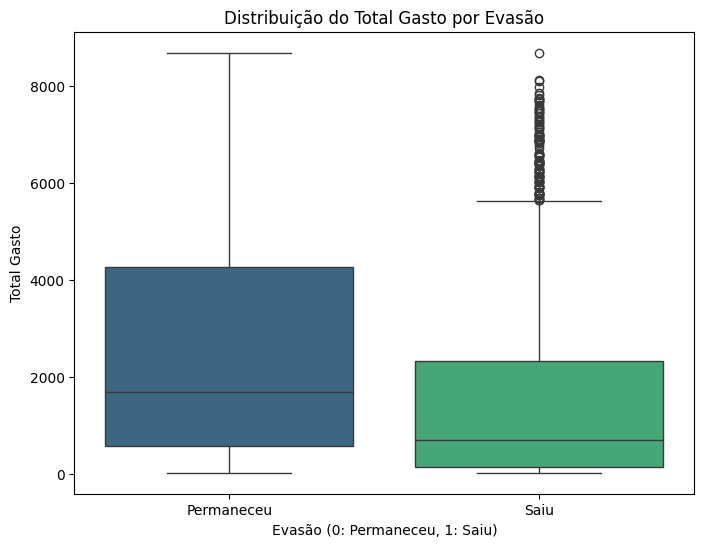

In [122]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='total_charges', data=dados_tratados, palette='viridis')
plt.title('Distribui√ß√£o do Total Gasto por Evas√£o')
plt.xlabel('Evas√£o (0: Permaneceu, 1: Saiu)')
plt.ylabel('Total Gasto')
plt.xticks([0, 1], ['Permaneceu', 'Saiu'])
plt.show()

### Scatter Plot ‚Äî Tempo de Contrato x Total Gasto com Churn
Aqui exploramos a rela√ß√£o entre duas vari√°veis juntas e como elas se comportam com churn:

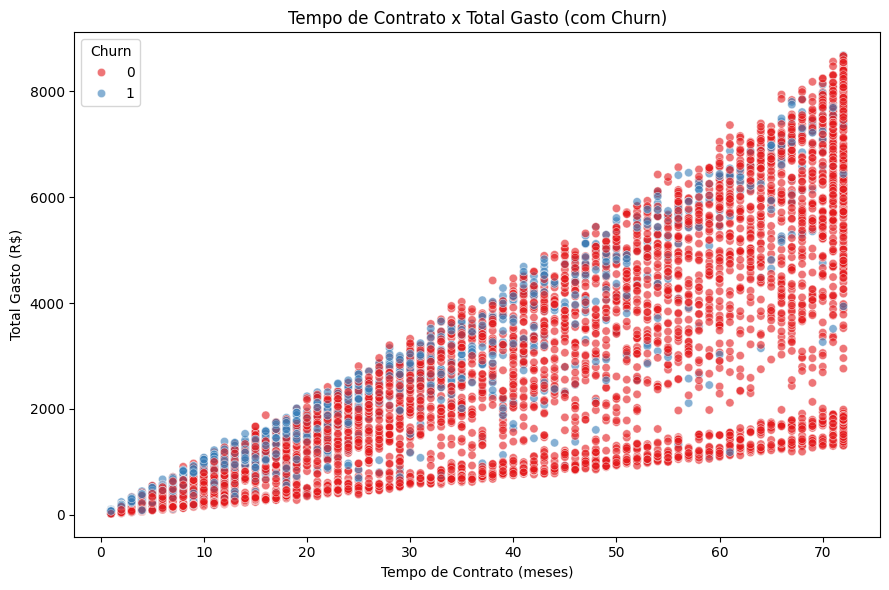

In [123]:
plt.figure(figsize=(9, 6))
sns.scatterplot(
    data=dados_tratados,
    x='tenure',
    y='total_charges',
    hue='churn',
    palette='Set1',
    alpha=0.6
)
plt.title('Tempo de Contrato x Total Gasto (com Churn)')
plt.xlabel('Tempo de Contrato (meses)')
plt.ylabel('Total Gasto (R$)')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()


Analisando o scatter plot de Tempo de Contrato `(tenure)` versus Total Gasto `(total_charges)` colorido pelo Churn, podemos tirar algumas conclus√µes importantes. Em resumo, o scatter plot visualmente refor√ßa o que vimos na an√°lise de correla√ß√£o e nos boxplots:

* O Tempo de Contrato `(tenure)` e o Total Gasto (`total_charges)` s√£o fortes indicadores de churn.
* Clientes de longo prazo e com alto gasto total s√£o menos propensos a cancelar.
* Clientes novos ou com baixo tempo de contrato e baixo total gasto t√™m uma probabilidade maior de churn.

>Esta visualiza√ß√£o √© poderosa porque nos permite ver a intera√ß√£o dessas duas vari√°veis em rela√ß√£o ao churn, identificando clusters e tend√™ncias que podem n√£o ser t√£o √≥bvias olhando apenas para correla√ß√µes individuais.

## Commit das Altera√ß√µes e Pr√≥ximos Passos

As altera√ß√µes realizadas nesta sess√£o (carregamento e tratamento dos dados, encoding, balanceamento de classes, treinamento e avalia√ß√£o dos modelos LR, RF e KNN, an√°lise de correla√ß√£o e an√°lises direcionadas) foram salvas e comitadas.

Continuaremos com os pr√≥ximos cart√µes do desafio, incluindo a sele√ß√£o de vari√°veis e outras an√°lises, na pr√≥xima sess√£o de trabalho.